In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [17]:
df = pd.read_csv("./data/cruise_ship_info.csv")


In [18]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


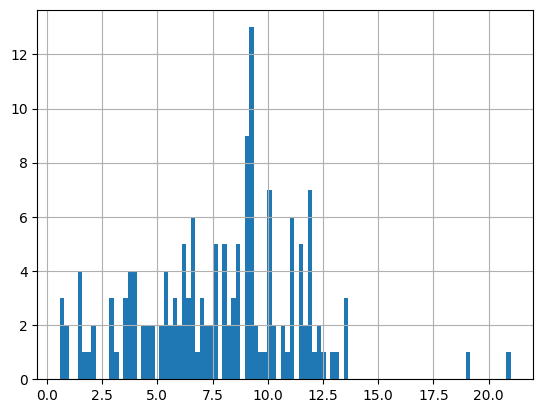

In [20]:
df["crew"].hist(bins=100)
plt.show()

In [21]:
vis_df = df.iloc[:, 1:]
vis_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


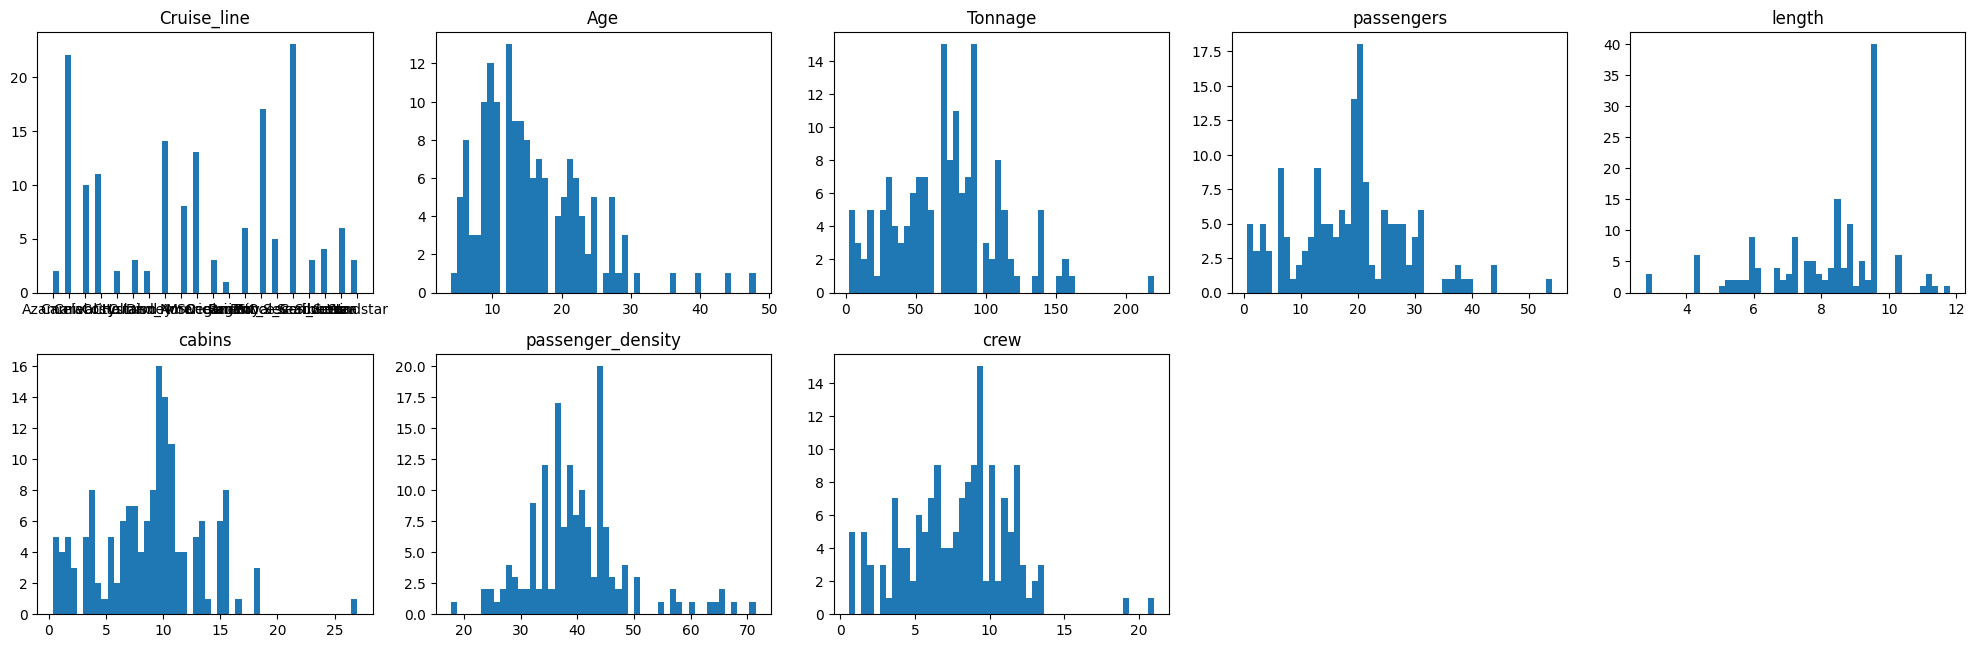

In [22]:
fig = plt.figure(figsize = (20, 16))

for i in range(len(vis_df.columns)):
    ax = fig.add_subplot(5, 5, i + 1)
    plt.hist(vis_df[vis_df.columns[i]], bins = 50)
    ax.set_title(vis_df.columns[i])
    
plt.tight_layout()
plt.show()

In [32]:
scale_col = df.columns[2:].tolist()

In [33]:
scale_col

['Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [53]:
ss = StandardScaler()

In [54]:
scaled_df = ss.fit_transform(df[scale_col])

In [55]:
scaled_df

array([[-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.31409539,
        -0.9406764 , -0.31330399],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -1.81502263,
        -0.70147068, -1.97978836],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -1.81502263,
        -0.91280777, -1.97978836],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -1.63105247,
         0.92536041, -1.71635785]])

In [56]:
scaled_df = pd.DataFrame(scaled_df, columns=scale_col)

In [57]:
scaled_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [58]:
scaled_df = pd.concat([df["Cruise_line"], scaled_df], axis=1)

In [59]:
scaled_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


One Hot Encoding for the Cruise_line columns

In [60]:
scaled_df["Cruise_line"].unique()

array(['Azamara', 'Carnival', 'Celebrity', 'Costa', 'Crystal', 'Cunard',
       'Disney', 'Holland_American', 'MSC', 'Norwegian', 'Oceania',
       'Orient', 'P&O', 'Princess', 'Regent_Seven_Seas',
       'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star', 'Windstar'],
      dtype=object)

In [61]:
ohe = OneHotEncoder()

In [62]:
cl_array = np.array(scaled_df["Cruise_line"])

In [63]:
cl_array = np.reshape(cl_array, (-1, 1))

In [65]:
cl_name = ohe.fit_transform(cl_array)

In [66]:
ohe.get_feature_names_out()

array(['x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American',
       'x0_MSC', 'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O',
       'x0_Princess', 'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean',
       'x0_Seabourn', 'x0_Silversea', 'x0_Star', 'x0_Windstar'],
      dtype=object)

In [67]:
ohe_cl_name_df = pd.DataFrame(cl_name.toarray(), columns=ohe.get_feature_names_out())

In [68]:
ohe_cl_name_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
scaled_df = pd.concat([ohe_cl_name_df, scaled_df], axis=1)

In [70]:
scaled_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Star,x0_Windstar,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [79]:
scaled_df = scaled_df.drop("Cruise_line", axis=1)

In [80]:
x = scaled_df.iloc[:, :-1]
y = scaled_df["crew"]

In [81]:
x.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar,Age,Tonnage,passengers,length,cabins,passenger_density
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


In [82]:
y.head()

0   -1.215267
1   -1.215267
2   -0.313304
3    3.237281
4    0.631610
Name: crew, dtype: float64

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
lr.coef_

array([ 1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        5.67697821e-02,  1.39850088e-01, -1.56058687e-01,  1.93816131e-01,
        8.89670145e-01,  8.27056646e-02])

In [87]:
lr.intercept_

-18203013860210.84

In [88]:
lr.score(x_test, y_test)

0.9511339854950991

In [89]:
pred = lr.predict(x_test)

In [90]:
mae = mean_absolute_error(y_test, pred)

In [91]:
mae

0.1462915149947101

In [ ]:
import stat